In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Dataset Information The Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchase
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user


In [3]:
df = pd.read_csv('/Users/neeti/Documents/Customer-Segmentation-Kubernetes-CI-CD/notebook/data/Customer Data.csv')

In [4]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [8]:
# Finding if there are any null values
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# impute the missing values for 'CREDIT_LIMIT' with the median

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

C:\Users\neeti\AppData\Local\Temp\ipykernel_5216\2085517347.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)


In [10]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

PAYMENTS  MINIMUM_PAYMENTS
3       0.000000               NaN
45      0.000000               NaN
47      0.000000               NaN
54    417.016763               NaN
55      0.000000               NaN
...          ...               ...
8919    0.000000               NaN
8929    0.000000               NaN
8935    0.000000               NaN
8944    0.000000               NaN
8946  275.861322               NaN

[313 rows x 2 columns]

In [11]:
# It is pretty obvious that customers who haven't done any payments wouldn't have minimum payments also. 
# Hence, if PAYMENTS = 0, MINIMUM_PAYMENTS = 0

df['PAYMENTS'][df['PAYMENTS'] == 0].value_counts()

PAYMENTS
0.0    240
Name: count, dtype: int64

In [12]:
# Looking at PAYMENTS that's above MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].shape)

df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] > df['MINIMUM_PAYMENTS'])].head()


Shape: (6272, 2)


PAYMENTS  MINIMUM_PAYMENTS
0   201.802084        139.509787
1  4103.032597       1072.340217
4   678.334763        244.791237
6  6354.314328        198.065894
7   679.065082        532.033990

In [13]:
# Looking at PAYMENTS that's below MINIMUM_PAYMENTS

print('Shape:', df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].shape)
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][(df['MINIMUM_PAYMENTS'].notna()) & (df['PAYMENTS'] < df['MINIMUM_PAYMENTS'])].head()

Shape: (2365, 2)


PAYMENTS  MINIMUM_PAYMENTS
2    622.066742        627.284787
5   1400.057770       2407.246035
10  1083.301007       2172.697765
14   805.647974        989.962866
15  1993.439277       2109.906490

Logically, if PAYMENTS are done it should be done above MINIMUM_PAYMENTS. Which is true for 6272 customers.

But on the other hand, we got 2364 customers who did the PAYMENTS below MINIMUM_PAYMENTS.

We will fill the missing values by the mean of PAYMENTS.

If the PAYMENTS is less than MINIMUM_PAYMENTS, the missing values will be filled by the corresponding PAYMENTS.

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class MinimumPaymentsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.payments_mean_ = None

    def fit(self, X, y=None):
        self.payments_mean_ = np.mean(X['PAYMENTS'])
        return self

    def transform(self, X):
        X = X.copy()
        minpay = X['MINIMUM_PAYMENTS'].copy()
        payments_mean = self.payments_mean_

        i = 0
        for payments, minpayments in zip(X['PAYMENTS'], X['MINIMUM_PAYMENTS'].isna()):
            if (payments == 0) and (minpayments == True):
                minpay.iloc[i] = 0
            elif (0 < payments < payments_mean) and (minpayments == True): 
                minpay.iloc[i] = payments
            elif minpayments == True: 
                minpay.iloc[i] = payments_mean
            i += 1
        
        X['MINIMUM_PAYMENTS'] = minpay.copy()
        return X


min_pay_imputer = MinimumPaymentsTransformer()
min_pay_imputer.fit(df)
df_n = min_pay_imputer.transform(df)
df_n.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Exploratory Data Analysis (EDA)

In [15]:
df_n['MINIMUM_PAYMENTS'][df_n['MINIMUM_PAYMENTS'] ==0].value_counts()

MINIMUM_PAYMENTS
0.0    240
Name: count, dtype: int64

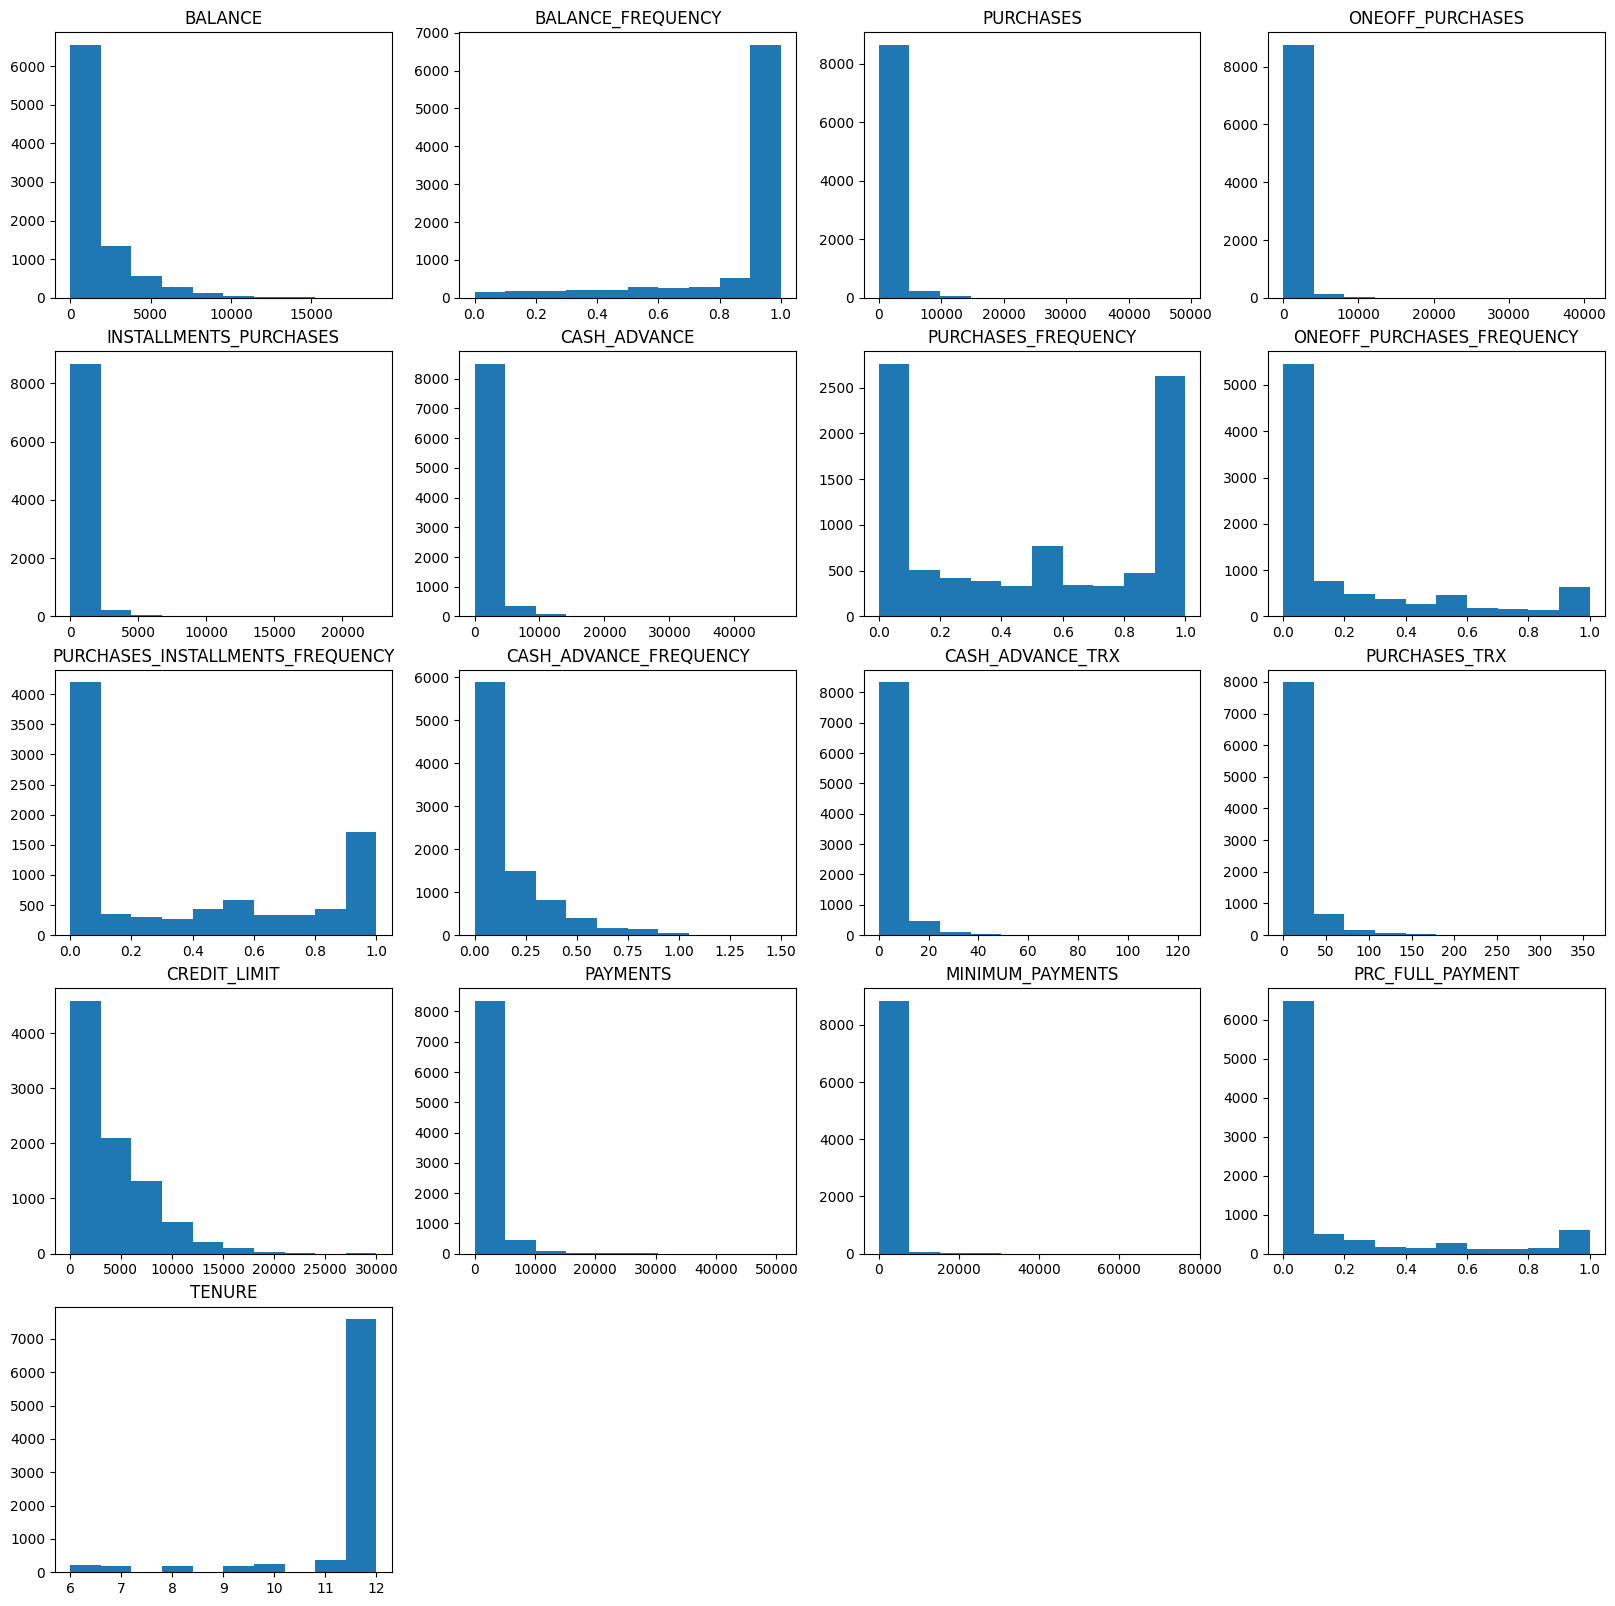

In [16]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize = (20,20))

z = 1
for i in range(5):
    for j in range(4):
        if z > 17:
            axs[i][j].axis(False)
        else:
            axs[i][j].set_title(df_n.iloc[:,z].name)
            axs[i][j].hist(df_n.iloc[:,z])
        z+=1

Turns out every feature has outliers. But this doesn't mean that we will delete the outliers, because it's possible that all of these values do happen on the field.
Hence, the treatment that will be applied is to do logarithmic scale for each features.

Logarithmic scale can be used, mathematically huge numbers is turned to much smaller without losing the meaning of the data.

Deriving New KPI

1. Monthly_avg_purchase and Cash Advance Amount

In [17]:
df_n['Monthly_avg_purchase']=df_n['PURCHASES']/df_n['TENURE']
df_n['Monthly_avg_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64

In [18]:
df_n['Monthly_cash_advance']=df_n['CASH_ADVANCE']/df_n['TENURE']
df_n['Monthly_cash_advance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance, dtype: float64

  2. Purchase Type: Let's explore what type of purchase customers are doing on the credit card.

In [19]:
df_n.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(20)

ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES
0               0.00                   95.40
1               0.00                    0.00
2             773.17                    0.00
3            1499.00                    0.00
4              16.00                    0.00
5               0.00                 1333.28
6            6402.63                  688.38
7               0.00                  436.20
8             661.49                  200.00
9            1281.60                    0.00
10              0.00                  920.12
11           1492.18                    0.00
12           2500.23                  717.76
13            419.96                 1717.97
14              0.00                    0.00
15              0.00                 1611.70
16              0.00                    0.00
17              0.00                  519.00
18            166.00                  338.35
19              0.00                  398.64

In [20]:
df_n[(df_n['ONEOFF_PURCHASES']>0) & (df_n['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [21]:
df_n[(df_n['ONEOFF_PURCHASES']==0) & (df_n['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [22]:
df_n[(df_n['ONEOFF_PURCHASES']>0) & (df_n['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [23]:
df_n[(df_n['ONEOFF_PURCHASES']==0) & (df_n['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

It is noticed that there are 4 types of purchase behaviour in the data set. 


1.   People who only do One-Off Purchases.
2.   People who only do Installments
3.   People who do both
4.   People who do none

In [24]:
# Deriving a categorical variable based on the purchase behaviour.

def purchase(df_n):
    if (df_n['ONEOFF_PURCHASES']>0) & (df_n['INSTALLMENTS_PURCHASES']==0):
        return 'ONE_OFF'
    if (df_n['ONEOFF_PURCHASES']==0) & (df_n['INSTALLMENTS_PURCHASES']>0):
        return 'INSTALLMENTS'
    if (df_n['ONEOFF_PURCHASES']>0) & (df_n['INSTALLMENTS_PURCHASES']>0):
        return 'BOTH'
    if (df_n['ONEOFF_PURCHASES']==0) & (df_n['INSTALLMENTS_PURCHASES']==0):
        return 'NONE'

In [25]:
df_n['purchase_type']=df_n.apply(purchase,axis=1)

In [26]:
df_n['purchase_type'].value_counts()

purchase_type
BOTH            2774
INSTALLMENTS    2260
NONE            2042
ONE_OFF         1874
Name: count, dtype: int64

3. Limit Usage (Balance to Credit limit ratio)

    Lower value implies customers are maintaining their balance properly. Lower value means good credit score.

In [27]:
df_n['limit_usage']=df_n['BALANCE']/df_n['CREDIT_LIMIT']

In [28]:
df_n['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [29]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

C:\Users\neeti\AppData\Local\Temp\ipykernel_5216\1607691604.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_n.groupby('purchase_type').apply(lambda x: np.mean(x['PRC_FULL_PAYMENT'])).plot.bar()


Text(0.5, 1.0, 'Average PRC_FULL_PAYMENT for each purchase type')

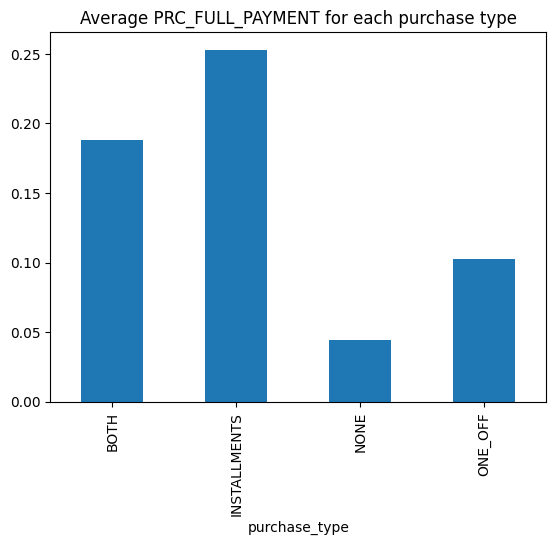

In [30]:
# Average PRC_full_payment for each purchase type.
df_n.groupby('purchase_type').apply(lambda x: np.mean(x['PRC_FULL_PAYMENT'])).plot.bar()
plt.title('Average PRC_FULL_PAYMENT for each purchase type')

Insight 1: Customers With Installment Purchases are good at Paying Dues

C:\Users\neeti\AppData\Local\Temp\ipykernel_5216\1086130394.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_n.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.bar()


Text(0.5, 1.0, 'Average cash advance taken by customers of different Purchase type')

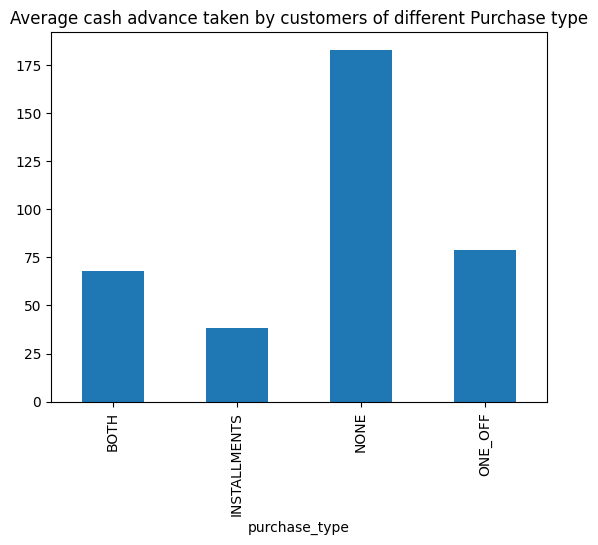

In [31]:
# Average cash advance taken by customers for different Purchase type
df_n.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.bar()

plt.title('Average cash advance taken by customers of different Purchase type')

Insight 2 : Customers who don't do either one-off or installment purchases take more cash on advance.

C:\Users\neeti\AppData\Local\Temp\ipykernel_5216\840927099.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_n.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.bar()


<Axes: xlabel='purchase_type'>

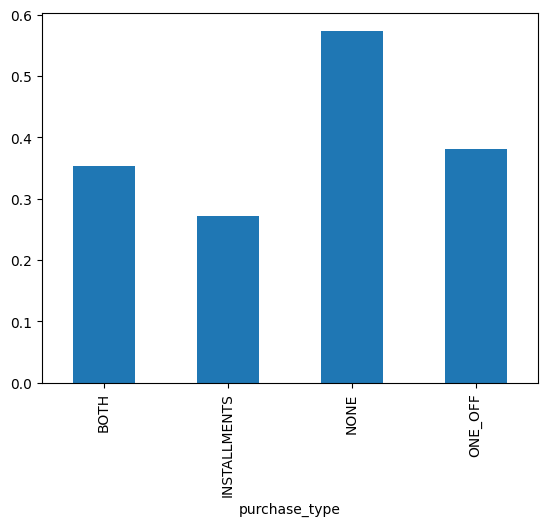

In [32]:
df_n.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.bar()

Insight 3: Customers with installment purchases have good credit score

Preparing for Machine Learning

In [33]:
# Encoding the categorical variable; Purchase_type

from sklearn.base import BaseEstimator, TransformerMixin

class OneHotEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column
        self.categories_ = None

    def fit(self, X, y=None):
        # Find unique categories in the specified column
        self.categories_ = X[self.column].unique()
        return self

    def transform(self, X):
        # Create a copy of the dataframe to avoid modifying the original dataframe
        X = X.copy()
        # Perform one-hot encoding
        for category in self.categories_:
            X[f'{category}'] = (X[self.column] == category).astype(int)
        # Drop the original column
        X.drop(columns=[self.column], inplace=True)
        return X

one_hot_encoder = OneHotEncoderTransformer(column='purchase_type')

df_transformed = one_hot_encoder.fit_transform(df_n)


In [34]:
df_transformed.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.083333  ...   
1                    0.000000                          0.000000  ...   
2                    1.000000                          0.000000  ...   
3                    0.083333                          0.000000  ...   
4                    0.083333                          0.000000  ...   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Monthly_avg_purchase  \
0        139.509787          0.000000      12              7.950000   
1       1072.340217          0.222222      12              0.000000   
2        627.284787          0.000000      12             64.430833   
3          0.000000          0.000000      12            124.916667   
4        244.791237          0.000000      12              1.333333   

   Monthly_cash_advance  limit_usage  INSTALLMENTS  NONE  ONE_OFF  BOTH  
0              0.000000     0.040901             1     0        0     0  
1            536.912124     0.457495             0     1        0     0  
2              0.000000     0.332687             0     0        1     0  
3             17.149001     0.222223             0     0        1     0  
4              0.000000     0.681429             0     0        1     0  

[5 rows x 25 columns]

In [89]:
df_transformed.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  ...  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
count             8950.000000  ...       8950.000000       8950.000000   
mean                 0.135144  ...        838.393982          0.153715   
std                  0.200121  ...       2335.359598          0.292499   
min                  0.000000  ...          0.000000          0.000000   
25%                  0.000000  ...        164.378505          0.000000   
50%                  0.000000  ...        295.620357          0.000000   
75%                  0.222222  ...        794.573294          0.142857   
max                  1.500000  ...      76406.207520          1.000000   

            TENURE  Monthly_avg_purchase  Monthly_cash_advance  limit_usage  \
count  8950.000000           8950.000000           8950.000000  8950.000000   
mean     11.517318             86.175173             88.977984     0.388884   
std       1.338331            180.508787            193.136115     0.389722   
min       6.000000              0.000000              0.000000     0.000000   
25%      12.000000              3.399375              0.000000     0.041494   
50%      12.000000             31.936667              0.000000     0.302720   
75%      12.000000             97.228333             99.085196     0.717571   
max      12.000000           4086.630833           3928.100980    15.909951   

       INSTALLMENTS         NONE      ONE_OFF         BOTH  
count   8950.000000  8950.000000  8950.000000  8950.000000  
mean       0.252514     0.228156     0.209385     0.309944  
std        0.434479     0.419667     0.406893     0.462496  
min        0.000000     0.000000     0.000000     0.000000  
25%        0.000000     0.000000     0.000000     0.000000  
50%        0.000000     0.000000     0.000000     0.000000  
75%        1.000000     0.000000     0.000000     1.000000  
max        1.000000     1.000000     1.000000     1.000000  

[8 rows x 24 columns]

In [35]:
col=['CUST_ID','BALANCE','PURCHASES','CASH_ADVANCE','TENURE','CREDIT_LIMIT']
df_pre=df_transformed[[x for x in df_transformed.columns if x not in col ]]

In [36]:
df_pre.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'Monthly_avg_purchase', 'Monthly_cash_advance',
       'limit_usage', 'INSTALLMENTS', 'NONE', 'ONE_OFF', 'BOTH'],
      dtype='object')

In [37]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   int64  
 8   PURCHASES_TRX                     8950 non-null   int64  
 9   PAYMENTS                          8950 non-null   float64
 10  MINIMUM_PAYMENTS                  8950 non-null   float64
 11  PRC_FULL_PAYMENT                  8950 non-null   float64
 12  Monthl

<Axes: >

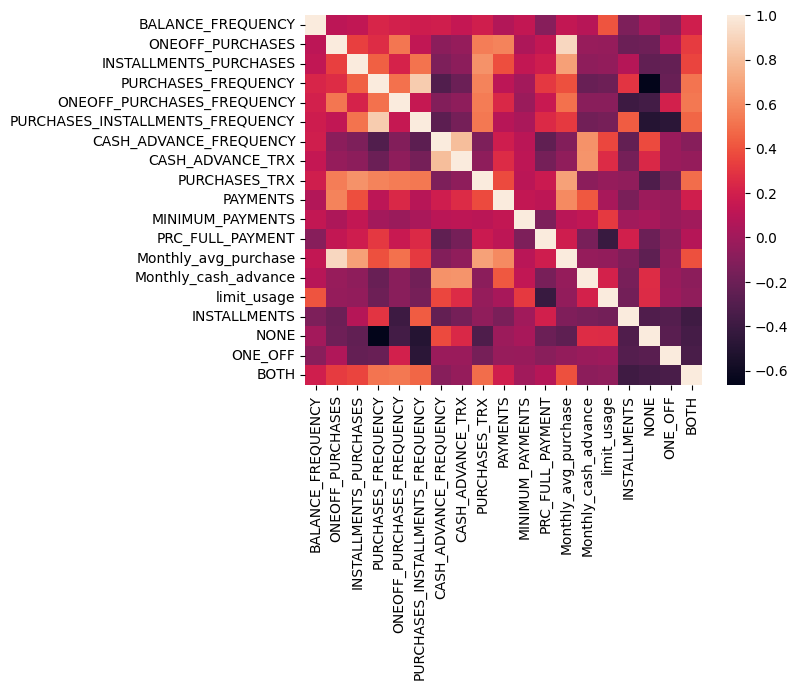

In [38]:
sns.heatmap(df_pre.corr())

Heat map shows that many features are co-related so applying dimensionality reduction (PCA) will help negating multi-colinearity in data.

Before applying PCA we have to standardize data to avoid the effect of scale on our result. 

Trying different scalers:

- MinMaxScaler
- StandardScaler
- RobustScaler
- MaxAbsScaler

Extreme value Treatment
- Since there are variables having extreme values, I am doing log-transformation on the dataset to remove outlier effect

In [39]:
num_cols = [
        'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
        'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS',
        'PRC_FULL_PAYMENT', 'Monthly_avg_purchase', 'Monthly_cash_advance',
        'limit_usage'
    ]

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Apply logarithmic transformation to all numerical columns
        X = X.copy()
        numerical_cols = num_cols
        X[numerical_cols] = X[numerical_cols].map(lambda x: np.log(x + 1))
        return X
    
log_transformer = LogTransformer()

df_log = log_transformer.fit_transform(df_pre)


In [40]:
df_log.describe()

BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count        8950.000000       8950.000000             8950.000000   
mean            0.619940          3.204274                3.352403   
std             0.148590          3.246365                3.082973   
min             0.000000          0.000000                0.000000   
25%             0.635989          0.000000                0.000000   
50%             0.693147          3.663562                4.499810   
75%             0.693147          6.360274                6.151961   
max             0.693147         10.615512               10.021315   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          8950.000000                 8950.000000   
mean              0.361268                    0.158699   
std               0.277317                    0.216672   
min               0.000000                    0.000000   
25%               0.080042                    0.000000   
50%               0.405465                    0.080042   
75%               0.650588                    0.262364   
max               0.693147                    0.693147   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       8950.000000             8950.000000   
mean                           0.270072                0.113512   
std                            0.281852                0.156716   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.154151                0.000000   
75%                            0.559616                0.200671   
max                            0.693147                0.916291   

       CASH_ADVANCE_TRX  PURCHASES_TRX     PAYMENTS  MINIMUM_PAYMENTS  \
count       8950.000000    8950.000000  8950.000000       8950.000000   
mean           0.817570       1.894731     6.624540          5.762333   
std            1.009316       1.373856     1.591763          1.514701   
min            0.000000       0.000000     0.000000          0.000000   
25%            0.000000       0.693147     5.951361          5.108237   
50%            0.000000       2.079442     6.754489          5.692453   
75%            1.609438       2.890372     7.550732          6.679063   
max            4.820282       5.883322    10.834125         11.243832   

       PRC_FULL_PAYMENT  Monthly_avg_purchase  Monthly_cash_advance  \
count       8950.000000           8950.000000           8950.000000   
mean           0.117730              3.050877              2.163970   
std            0.211617              2.002823              2.429741   
min            0.000000              0.000000              0.000000   
25%            0.000000              1.481458              0.000000   
50%            0.000000              3.494587              0.000000   
75%            0.133531              4.587295              4.606022   
max            0.693147              8.315721              8.276166   

       limit_usage  INSTALLMENTS         NONE      ONE_OFF         BOTH  
count  8950.000000   8950.000000  8950.000000  8950.000000  8950.000000  
mean      0.296081      0.252514     0.228156     0.209385     0.309944  
std       0.250303      0.434479     0.419667     0.406893     0.462496  
min       0.000000      0.000000     0.000000     0.000000     0.000000  
25%       0.040656      0.000000     0.000000     0.000000     0.000000  
50%       0.264455      0.000000     0.000000     0.000000     0.000000  
75%       0.540911      1.000000     0.000000     0.000000     1.000000  
max       2.827902      1.000000     1.000000     1.000000     1.000000

In [41]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE_FREQUENCY                 8950 non-null   float64
 1   ONEOFF_PURCHASES                  8950 non-null   float64
 2   INSTALLMENTS_PURCHASES            8950 non-null   float64
 3   PURCHASES_FREQUENCY               8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 7   CASH_ADVANCE_TRX                  8950 non-null   float64
 8   PURCHASES_TRX                     8950 non-null   float64
 9   PAYMENTS                          8950 non-null   float64
 10  MINIMUM_PAYMENTS                  8950 non-null   float64
 11  PRC_FULL_PAYMENT                  8950 non-null   float64
 12  Monthl

In [42]:
from sklearn.preprocessing import MinMaxScaler

df_minmax_sc = MinMaxScaler().fit_transform(df_log)

In [43]:
from sklearn.preprocessing import StandardScaler

df_std_sc = StandardScaler().fit_transform(df_log)

In [44]:
from sklearn.preprocessing import RobustScaler

df_robust_sc = RobustScaler().fit_transform(df_log)

In [45]:
from sklearn.preprocessing import MaxAbsScaler

df_maxAb_sc = MaxAbsScaler().fit_transform(df_log)

In [46]:
from sklearn.decomposition import PCA

In [47]:
def scree_plot(pca, scaled, scaler):
    df_pca = pca.fit(scaled)
    per_var = np.round(df_pca.explained_variance_ratio_* 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

    plt.figure(figsize = (7,5))
    plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
    plt.plot(range(1,len(per_var)+1), per_var, c = 'red')
    plt.ylabel('Percentage of Explained Variance', size = 13)
    plt.xlabel('Principal Components', size = 13)
    plt.title('Scree Plot (%s)' %(scaler), size = 15)
    plt.grid()
    plt.show()
    print('%s%% variance of the dataset lies on the first 3 Principal Components'  %(np.sum(per_var[:3])))

In [48]:
import plotly.express as px

def scatter_plot3D(pca_data):
    x, y, z = pca_data[:,:3].T
    fig = px.scatter_3d(x = x, 
                        y = y, 
                        z = z)
    fig.show()

In [49]:
def var_ratio(pca, scaled):
  var_ratio={}
  for n in range(4,17):
    pca = PCA(n_components = n)
    df_pca = pca.fit(scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)
  return var_ratio

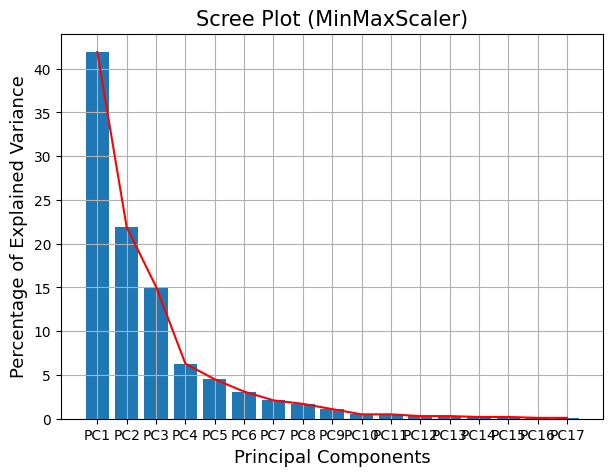

78.89999999999999% variance of the dataset lies on the first 3 Principal Components


{4: 0.8517427897050461,
 5: 0.8970398957061936,
 6: 0.9278429655391669,
 7: 0.948601906683723,
 8: 0.9659532351933725,
 9: 0.9773254368887251,
 10: 0.9827324779199796,
 11: 0.9875110456218714,
 12: 0.9909460691923461,
 13: 0.9941578593668807,
 14: 0.9959742982162303,
 15: 0.9975251961742008,
 16: 0.9987160313911108}

In [50]:
# PCA with MinMaxScaler

pca = PCA(n_components = 17)

scree_plot(pca, df_minmax_sc, 'MinMaxScaler')
var_ratio(pca, df_minmax_sc)

<Axes: >

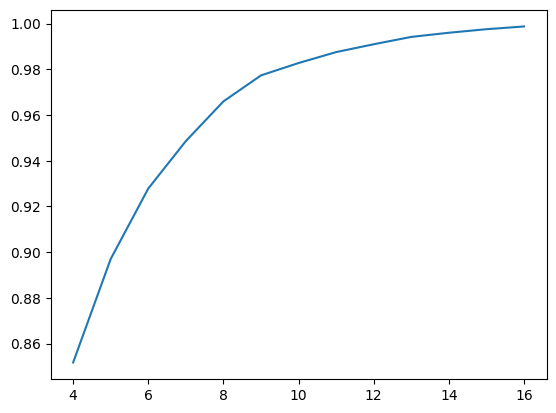

In [51]:
pd.Series(var_ratio(pca, df_minmax_sc)).plot()

In [52]:
pca_data = pca.transform(df_minmax_sc)
scatter_plot3D(pca_data)

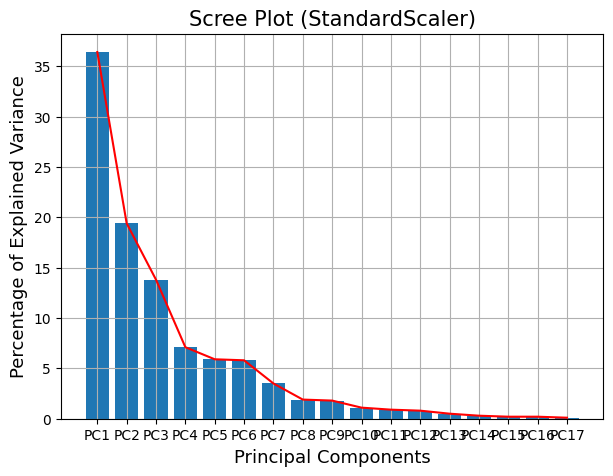

69.6% variance of the dataset lies on the first 3 Principal Components


{4: 0.7671827648817298,
 5: 0.826031580187948,
 6: 0.8839559845379487,
 7: 0.9193372942932035,
 8: 0.9382836337893806,
 9: 0.9567164397468123,
 10: 0.9677527503171603,
 11: 0.9772437747507312,
 12: 0.9856119493358981,
 13: 0.9908608717981452,
 14: 0.9935552419830666,
 15: 0.9959093089237163,
 16: 0.9981945974514951}

In [53]:
# PCA with StandardScaler

pca = PCA(n_components = 17)

scree_plot(pca, df_std_sc, 'StandardScaler')
var_ratio(pca, df_std_sc)

<Axes: >

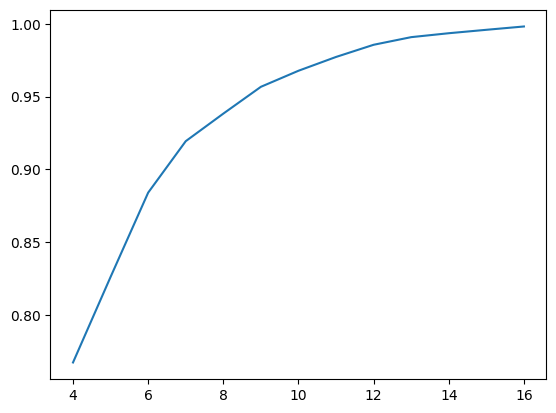

In [54]:
pd.Series(var_ratio(pca, df_std_sc)).plot()

In [55]:
pca_data = pca.transform(df_std_sc)
scatter_plot3D(pca_data)

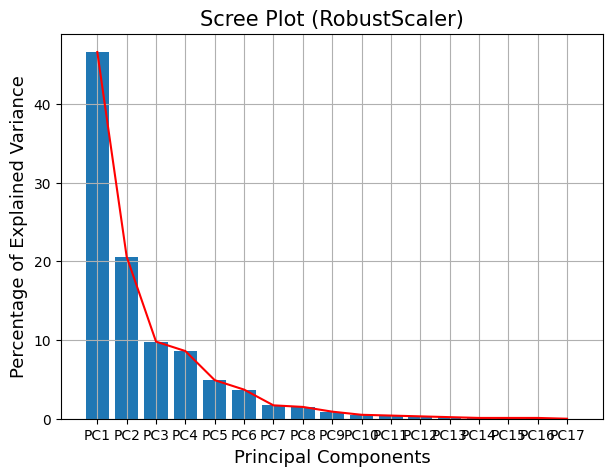

77.0% variance of the dataset lies on the first 3 Principal Components


{4: 0.8554059694362933,
 5: 0.9041775188193676,
 6: 0.9414447019861709,
 7: 0.9588524900343521,
 8: 0.9736782275241938,
 9: 0.9824990569012607,
 10: 0.9876203588827911,
 11: 0.991475549598028,
 12: 0.994598530454868,
 13: 0.9964674378804629,
 14: 0.997687844159455,
 15: 0.9987674325464052,
 16: 0.9994846457968243}

In [58]:
# PCA with RobustScaler

pca = PCA(n_components = 17)

scree_plot(pca, df_robust_sc, 'RobustScaler')
var_ratio(pca, df_robust_sc)

<Axes: >

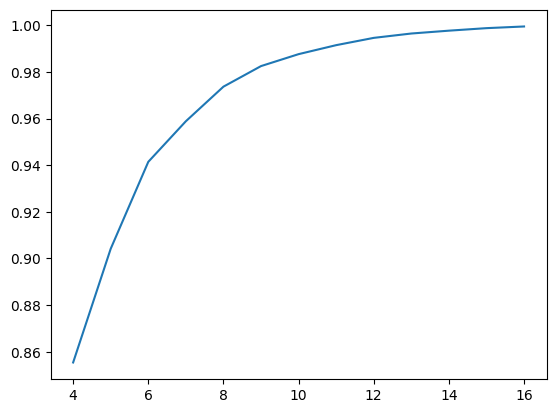

In [63]:
pd.Series(var_ratio(pca, df_robust_sc)).plot()

In [59]:
pca_data = pca.transform(df_robust_sc)
scatter_plot3D(pca_data)

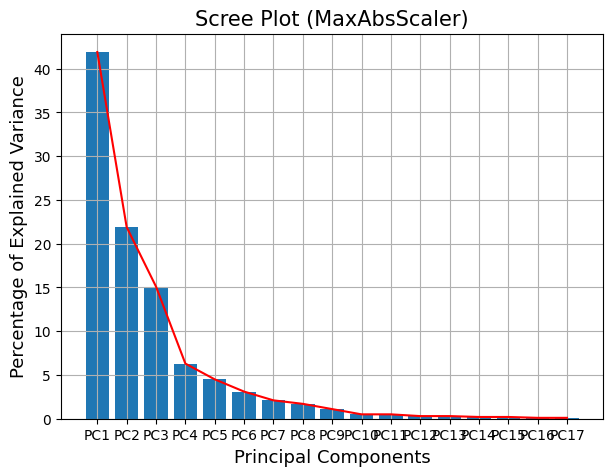

78.89999999999999% variance of the dataset lies on the first 3 Principal Components


{4: 0.8517427897050462,
 5: 0.8970398957061937,
 6: 0.927842965539167,
 7: 0.9486019066837231,
 8: 0.9659532351933726,
 9: 0.9773254368887252,
 10: 0.9827324779199796,
 11: 0.9875110456218714,
 12: 0.990946069192346,
 13: 0.9941578593668806,
 14: 0.9959742982162302,
 15: 0.9975251961742007,
 16: 0.9987160313911106}

In [60]:
# PCA with MaxAbsScaler

pca = PCA(n_components = 17)

scree_plot(pca, df_maxAb_sc, 'MaxAbsScaler')
var_ratio(pca, df_maxAb_sc)

<Axes: >

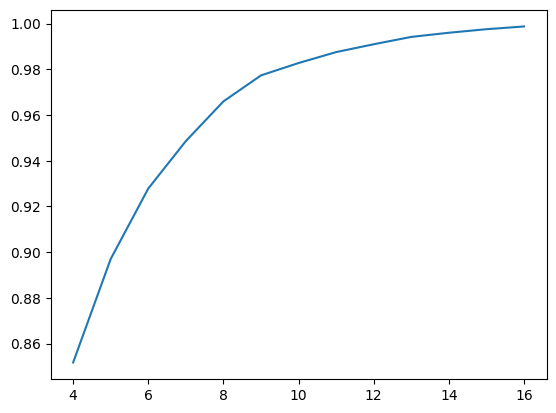

In [61]:
pd.Series(var_ratio(pca, df_maxAb_sc)).plot()

In [62]:
pca_data = pca.transform(df_maxAb_sc)
scatter_plot3D(pca_data)

Conclusion on Data Preparation

MinMaxScaler did the best for resulting in good shape of clusters, and also have big value of 5 Principal Components which is 89.7% Hence, MinMaxScaler is used to transform the data before PCA Transformation (ncomponents = 5)

In [133]:
pc_final = PCA(n_components=5).fit(df_minmax_sc)

reduced_df = pc_final.fit_transform(df_minmax_sc)

In [134]:
dd=pd.DataFrame(reduced_df)

In [135]:
dd.shape

(8950, 5)

In [136]:
dd.head()

0         1         2         3         4
0 -0.219168  0.813258  0.346734 -0.118091 -0.389941
1 -1.258062  0.060875 -0.551123 -0.053790  0.349339
2  0.121863 -0.828419  0.954578  0.113334  0.133441
3 -0.583122 -0.571761  0.871846 -0.039664 -0.321398
4 -0.666254 -0.387379  0.798650 -0.102766 -0.278348

In [137]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.419222
PC_1    0.218790
PC_2    0.150827
PC_3    0.062904
PC_4    0.045297
dtype: float64

In [138]:
col_list = df_pre.columns
col_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS',
       'PRC_FULL_PAYMENT', 'Monthly_avg_purchase', 'Monthly_cash_advance',
       'limit_usage', 'INSTALLMENTS', 'NONE', 'ONE_OFF', 'BOTH'],
      dtype='object')

In [139]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=col_list)

PC_0      PC_1      PC_2      PC_3  \
BALANCE_FREQUENCY                 0.036623 -0.053149 -0.103235  0.248984   
ONEOFF_PURCHASES                  0.178724 -0.401776  0.090012  0.010532   
INSTALLMENTS_PURCHASES            0.313911  0.155676 -0.141116  0.031988   
PURCHASES_FREQUENCY               0.429457  0.053225  0.037593  0.167354   
ONEOFF_PURCHASES_FREQUENCY        0.185663 -0.333691  0.045236 -0.007010   
PURCHASES_INSTALLMENTS_FREQUENCY  0.397073  0.235577 -0.159167  0.132314   
CASH_ADVANCE_FREQUENCY           -0.083155 -0.044291 -0.127506  0.307178   
CASH_ADVANCE_TRX                 -0.110900 -0.057273 -0.170825  0.385572   
PURCHASES_TRX                     0.252270 -0.038744  0.026374  0.092838   
PAYMENTS                          0.031551 -0.054816 -0.064129  0.106106   
MINIMUM_PAYMENTS                 -0.002962 -0.031734 -0.067722  0.191581   
PRC_FULL_PAYMENT                  0.116545  0.083391  0.079374 -0.407437   
Monthly_avg_purchase              0.243532 -0.089007  0.107578  0.090997   
Monthly_cash_advance             -0.174055 -0.075359 -0.250368  0.505729   
limit_usage                      -0.028553 -0.021709 -0.047542  0.129892   
INSTALLMENTS                      0.118126  0.623116  0.225209  0.187600   
NONE                             -0.376637  0.040350 -0.415425 -0.206596   
ONE_OFF                          -0.110037 -0.326267  0.621175  0.192157   
BOTH                              0.368548 -0.337199 -0.430959 -0.173161   

                                      PC_4  
BALANCE_FREQUENCY                 0.147307  
ONEOFF_PURCHASES                 -0.015448  
INSTALLMENTS_PURCHASES           -0.067809  
PURCHASES_FREQUENCY               0.179306  
ONEOFF_PURCHASES_FREQUENCY        0.243788  
PURCHASES_INSTALLMENTS_FREQUENCY  0.011550  
CASH_ADVANCE_FREQUENCY            0.140185  
CASH_ADVANCE_TRX                  0.170277  
PURCHASES_TRX                     0.067174  
PAYMENTS                          0.192016  
MINIMUM_PAYMENTS                  0.040660  
PRC_FULL_PAYMENT                  0.800105  
Monthly_avg_purchase              0.040823  
Monthly_cash_advance              0.229753  
limit_usage                      -0.042709  
INSTALLMENTS                     -0.010988  
NONE                              0.198773  
ONE_OFF                           0.040937  
BOTH                             -0.228722

Clustering

K-Means Clustering

K-Means Clustering is a type of Unsupervised Learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.

Choosing the number of K

If the true label is not known in advance, then K-Means clustering can be evaluated using Elbow Criterion, and validated using Silhouette Coefficient.

In [140]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [141]:
inertia = []
silh = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(reduced_df)
    inertia.append(kmeans.inertia_)
    silh.append(silhouette_score(reduced_df, kmeans.labels_))

Elbow Criterion Method: The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (e.g k=1 to 10), for each value of k, calculate sum of squared errors (SSE).

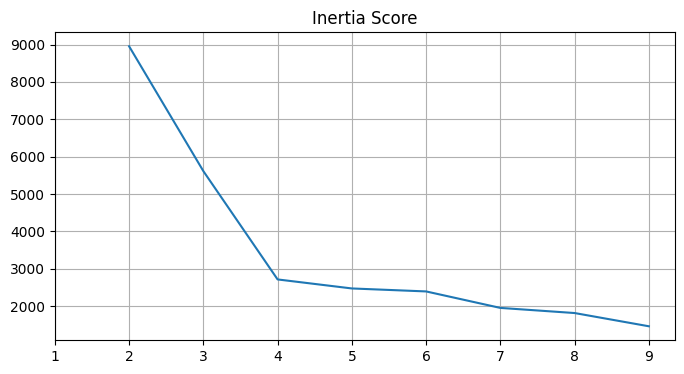

In [142]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), inertia)
plt.title('Inertia Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

Silhouette Coefficient Method: A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

The mean distance between a sample and all other points in the same class.
The mean distance between a sample and all other points in the next nearest cluster.

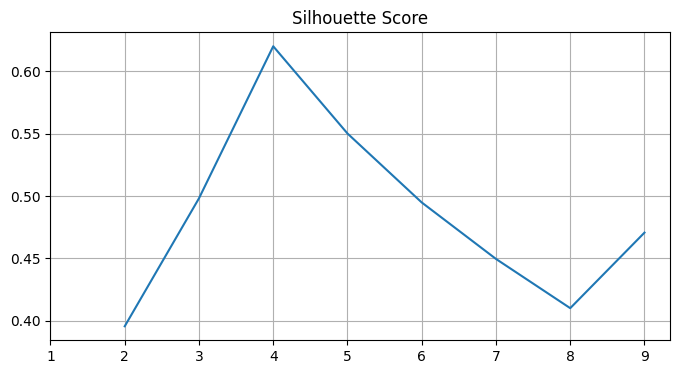

In [143]:
plt.figure(figsize = (8,4))
plt.plot(range(2,10), silh)
plt.title('Silhouette Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

In [144]:
# Choosing cluster = 4

km_4 = KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_df)
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [145]:
pd.Series(km_4.labels_).value_counts()

2    2774
0    2260
1    2042
3    1874
Name: count, dtype: int64

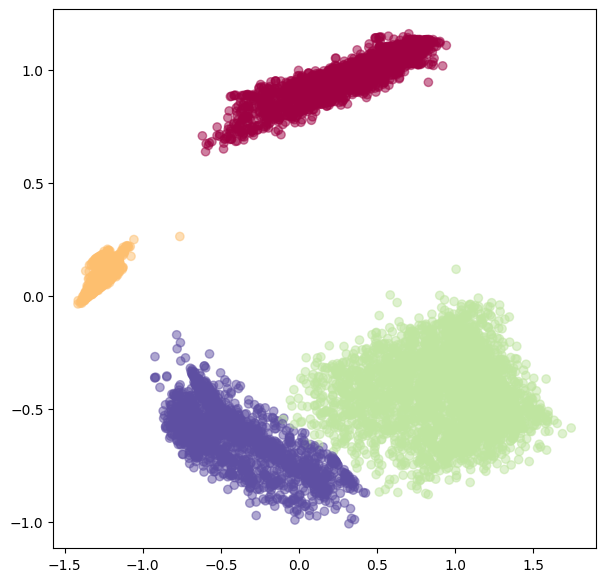

In [146]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_df[:,0],reduced_df[:,1],c= km_4.labels_,cmap='Spectral',alpha=0.5)

In [147]:
x, y, z = reduced_df[:,:3].T
fig = px.scatter_3d(x = x, 
                        y = y, 
                        z = z,
                    color = km_4.labels_)
fig.show()

In [148]:
# Key performace variable selection . Here i am dropping varibales which are used in deriving new KPI
col_kpi=['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT',
         'CREDIT_LIMIT', 'Monthly_avg_purchase', 'Monthly_cash_advance','limit_usage',
         'INSTALLMENTS', 'NONE','ONE_OFF', 'BOTH']


In [149]:
cluster_df_4=pd.concat([df_transformed[col_kpi],pd.Series(km_4.labels_, name='Cluster_4')],axis=1)

In [150]:
cluster_df_4.head()

CASH_ADVANCE_TRX  PURCHASES_TRX     PAYMENTS  MINIMUM_PAYMENTS  \
0                 0              2   201.802084        139.509787   
1                 4              0  4103.032597       1072.340217   
2                 0             12   622.066742        627.284787   
3                 1              1     0.000000          0.000000   
4                 0              1   678.334763        244.791237   

   PRC_FULL_PAYMENT  CREDIT_LIMIT  Monthly_avg_purchase  Monthly_cash_advance  \
0          0.000000        1000.0              7.950000              0.000000   
1          0.222222        7000.0              0.000000            536.912124   
2          0.000000        7500.0             64.430833              0.000000   
3          0.000000        7500.0            124.916667             17.149001   
4          0.000000        1200.0              1.333333              0.000000   

   limit_usage  INSTALLMENTS  NONE  ONE_OFF  BOTH  Cluster_4  
0     0.040901             1     0        0     0          0  
1     0.457495             0     1        0     0          1  
2     0.332687             0     0        1     0          3  
3     0.222223             0     0        1     0          3  
4     0.681429             0     0        1     0          3

In [151]:
cluster_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CASH_ADVANCE_TRX      8950 non-null   int64  
 1   PURCHASES_TRX         8950 non-null   int64  
 2   PAYMENTS              8950 non-null   float64
 3   MINIMUM_PAYMENTS      8950 non-null   float64
 4   PRC_FULL_PAYMENT      8950 non-null   float64
 5   CREDIT_LIMIT          8950 non-null   float64
 6   Monthly_avg_purchase  8950 non-null   float64
 7   Monthly_cash_advance  8950 non-null   float64
 8   limit_usage           8950 non-null   float64
 9   INSTALLMENTS          8950 non-null   int32  
 10  NONE                  8950 non-null   int32  
 11  ONE_OFF               8950 non-null   int32  
 12  BOTH                  8950 non-null   int32  
 13  Cluster_4             8950 non-null   int32  
dtypes: float64(7), int32(5), int64(2)
memory usage: 804.2 KB


In [152]:
cluster_df_4.describe()


CASH_ADVANCE_TRX  PURCHASES_TRX      PAYMENTS  MINIMUM_PAYMENTS  \
count       8950.000000    8950.000000   8950.000000       8950.000000   
mean           3.248827      14.709832   1733.143852        838.393982   
std            6.824647      24.857649   2895.063757       2335.359598   
min            0.000000       0.000000      0.000000          0.000000   
25%            0.000000       1.000000    383.276166        164.378505   
50%            0.000000       7.000000    856.901546        295.620357   
75%            4.000000      17.000000   1901.134317        794.573294   
max          123.000000     358.000000  50721.483360      76406.207520   

       PRC_FULL_PAYMENT  CREDIT_LIMIT  Monthly_avg_purchase  \
count       8950.000000   8950.000000           8950.000000   
mean           0.153715   4494.282473             86.175173   
std            0.292499   3638.646702            180.508787   
min            0.000000     50.000000              0.000000   
25%            0.000000   1600.000000              3.399375   
50%            0.000000   3000.000000             31.936667   
75%            0.142857   6500.000000             97.228333   
max            1.000000  30000.000000           4086.630833   

       Monthly_cash_advance  limit_usage  INSTALLMENTS         NONE  \
count           8950.000000  8950.000000   8950.000000  8950.000000   
mean              88.977984     0.388884      0.252514     0.228156   
std              193.136115     0.389722      0.434479     0.419667   
min                0.000000     0.000000      0.000000     0.000000   
25%                0.000000     0.041494      0.000000     0.000000   
50%                0.000000     0.302720      0.000000     0.000000   
75%               99.085196     0.717571      1.000000     0.000000   
max             3928.100980    15.909951      1.000000     1.000000   

           ONE_OFF         BOTH    Cluster_4  
count  8950.000000  8950.000000  8950.000000  
mean      0.209385     0.309944     1.476201  
std       0.406893     0.462496     1.083219  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     2.000000  
75%       0.000000     1.000000     2.000000  
max       1.000000     1.000000     3.000000

In [155]:
# For binary or categorical features, calculate proportions or counts instead of mean
cluster_counts = cluster_df_4.groupby('Cluster_4')[['INSTALLMENTS', 'NONE', 'ONE_OFF', 'BOTH']].sum().reset_index()

# Combine with the mean values of the continuous features
continuous_features_mean = cluster_df_4.groupby('Cluster_4')[col_kpi[:-4]].mean().reset_index()
combined_df = pd.merge(continuous_features_mean, cluster_counts, on='Cluster_4')

Eval_df = combined_df.set_index('Cluster_4').transpose()
# Display the resulting dataframe
print(Eval_df)

Cluster_4                       0            1            2            3
CASH_ADVANCE_TRX         1.265487     6.299706     2.832733     2.932231
PURCHASES_TRX           11.900885     0.001469    32.959625     7.109925
PAYMENTS               994.197964  1653.687908  2545.447418  1508.456900
MINIMUM_PAYMENTS       836.805316   969.495204   836.245048   700.636690
PRC_FULL_PAYMENT         0.253031     0.044367     0.187945     0.102421
CREDIT_LIMIT          3371.864329  4025.987594  5738.829463  4515.920572
Monthly_avg_purchase    46.974347     0.000000   192.685172    69.688958
Monthly_cash_advance    38.398206   182.858169    67.821985    78.995966
limit_usage              0.271678     0.573771     0.353548     0.381074
INSTALLMENTS          2260.000000     0.000000     0.000000     0.000000
NONE                     0.000000  2042.000000     0.000000     0.000000
ONE_OFF                  0.000000     0.000000     0.000000  1874.000000
BOTH                     0.000000     0.000000  277

In [154]:
# Percentage of each cluster in the total customer base
s = cluster_df_4.groupby('Cluster_4')['Cluster_4'].value_counts()
print (s),'\n'

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 "),'\n'

print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1))

Cluster_4
0    2260
1    2042
2    2774
3    1874
Name: count, dtype: int64
Cluster -4 
   Size  Percentage
0  2260   25.251397
1  2042   22.815642
2  2774   30.994413
3  1874   20.938547


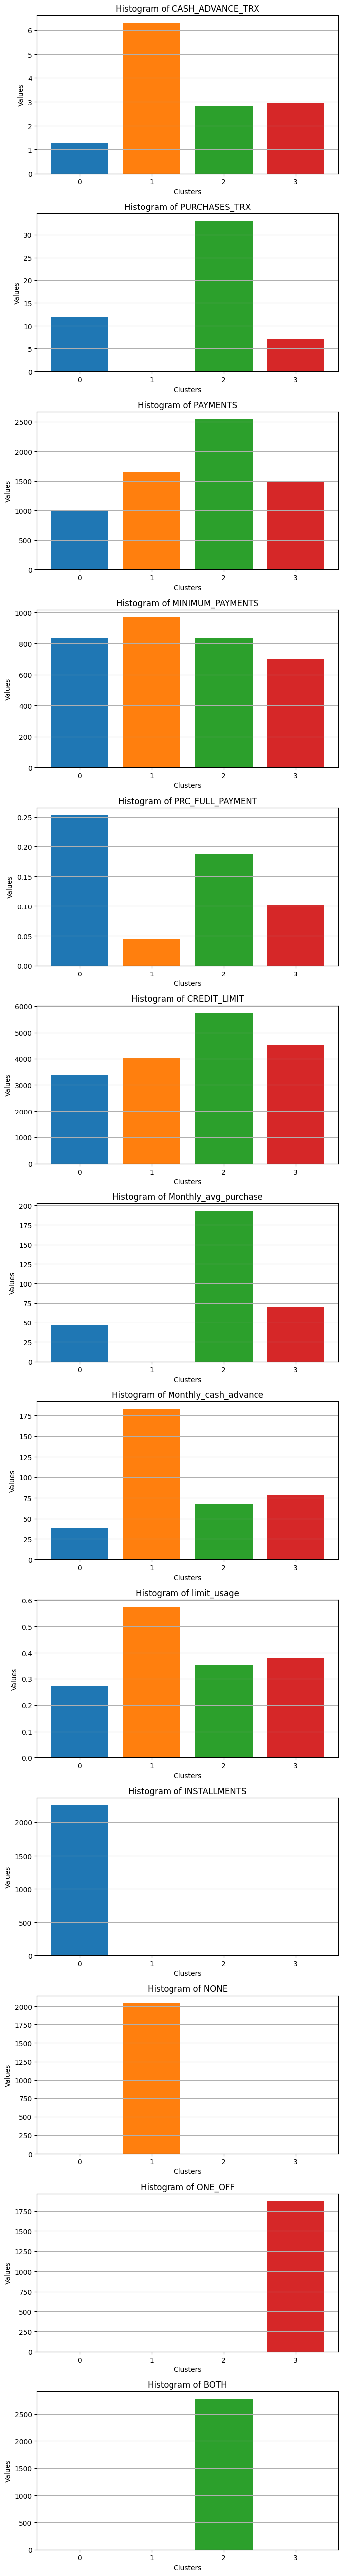

In [164]:
# Generate a color map
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(Eval_df.columns))]

# Number of features to plot
num_features = len(Eval_df.index)

fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(7, num_features * 4))

# Iterate over each row in the transposed dataframe and create a histogram
for i, row in enumerate(Eval_df.index):
    axes[i].bar(Eval_df.columns, Eval_df.loc[row], color=colors)
    axes[i].set_title(f'Histogram of {row}')
    axes[i].set_xlabel('Clusters')
    axes[i].set_ylabel('Values')
    axes[i].set_xticks(range(len(Eval_df.columns)))
    axes[i].set_xticklabels(Eval_df.columns)
    axes[i].grid(axis='y')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
import os
import sys

In [16]:

pca_data_df = pd.read_csv('/Users/neeti/Documents/Customer-Segmentation-Kubernetes-CI-CD/artifacts/pca_data.csv', header=None)
pca_data = pca_data_df.values

In [19]:
pca_data.shape

(8950, 5)